### Predicting Quality of Patient Care with Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd

**Metadata:**

- **MemberID** numbers the patients from 1 to 131, and is just an identifying number.
- **InpatientDays** is the number of inpatient visits, or number of days the person spent in the hospital.
- **ERVisits** is the number of times the patient visited the emergency room.
- **OfficeVisits** is the number of times the patient visited any doctor's office.
- **Narcotics** is the number of prescriptions the patient had for narcotics.
- **DaysSinceLastERVisit** is the number of days between the patient's last emergency room visit and the end of the study period (set to the length of the study period if they never visited the ER). 
- **Pain** is the number of visits for which the patient complained about pain.
- **TotalVisits** is the total number of times the patient visited any healthcare provider.
- **ProviderCount** is the number of providers that served the patient.
- **MedicalClaims** is the number of days on which the patient had a medical claim.
- **ClaimLines** is the total number of medical claims.
- **StartedOnCombination** is whether or not the patient was started on a combination of drugs to treat their diabetes (TRUE or FALSE).
- **AcuteDrugGapSmall** is the fraction of acute drugs that were refilled quickly after the prescription ran out.
- **PoorCare** is the outcome or dependent variable, and is equal to 1 if the patient had poor care, and equal to 0 if the patient had good care.

In [2]:
df = pd.read_csv('../data/quality.csv')

In [3]:
df.head()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731.0,10,18,21,93,222,False,0,0
1,2,1,1,6,1,411.0,0,8,27,19,115,False,1,0
2,3,0,0,5,3,731.0,10,5,16,27,148,False,5,0
3,4,0,1,19,0,158.0,34,20,14,59,242,False,0,0
4,5,8,2,19,3,449.0,10,29,24,51,204,False,0,0


In [4]:
df['PoorCare'].value_counts()

0    98
1    33
Name: PoorCare, dtype: int64

In [5]:
df['PoorCare'].value_counts(normalize=True)

0    0.748092
1    0.251908
Name: PoorCare, dtype: float64

About 75% of patients receive good care, 25% receive poor care.

In [14]:
y = df['PoorCare']

In [15]:
X = df[['OfficeVisits','Narcotics']]

In [16]:
X.ndim

2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=777)

In [22]:
y_test.value_counts(normalize=True)

0    0.727273
1    0.272727
Name: PoorCare, dtype: float64

In [24]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [28]:
log_reg.predict(X_test)

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [32]:
log_reg.score(X_test, y_test)

0.8181818181818182

#### Create Confusion Matrix

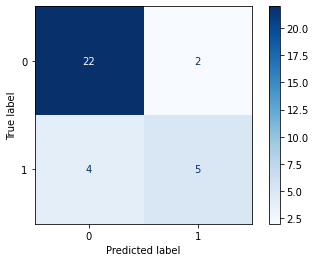

In [36]:
cmatrix = plot_confusion_matrix(log_reg, X_test, y_test, cmap='Blues', values_format='d')

In [38]:
cmatrix.confusion_matrix

array([[22,  2],
       [ 4,  5]])